**Design Optimization HW 2 - Dhinakar Venkatagiri**




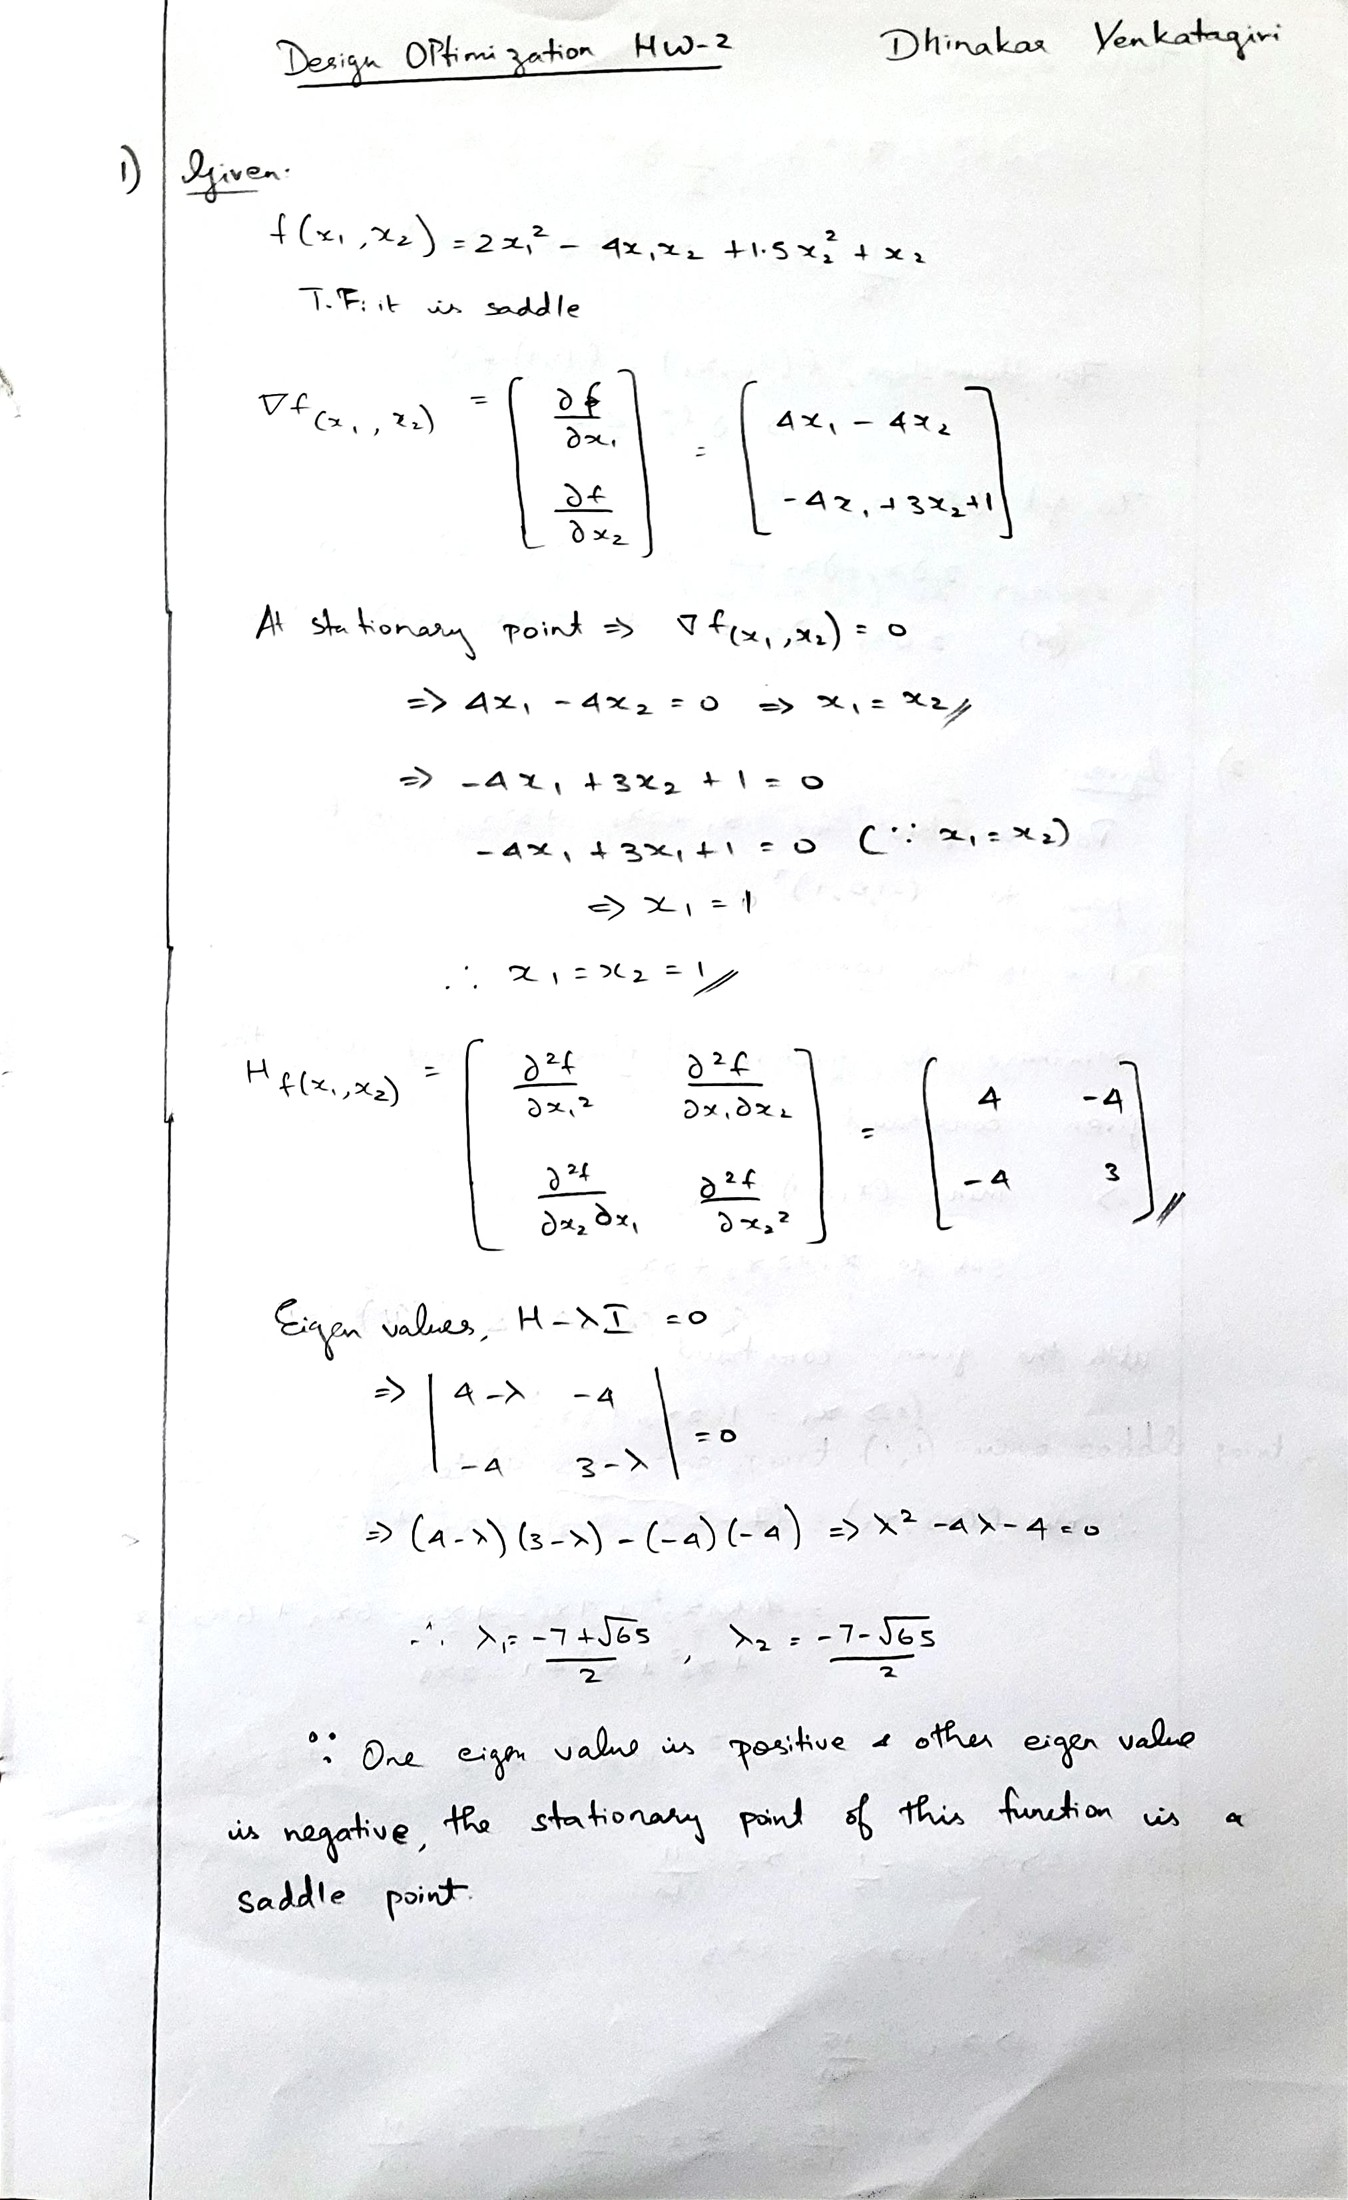

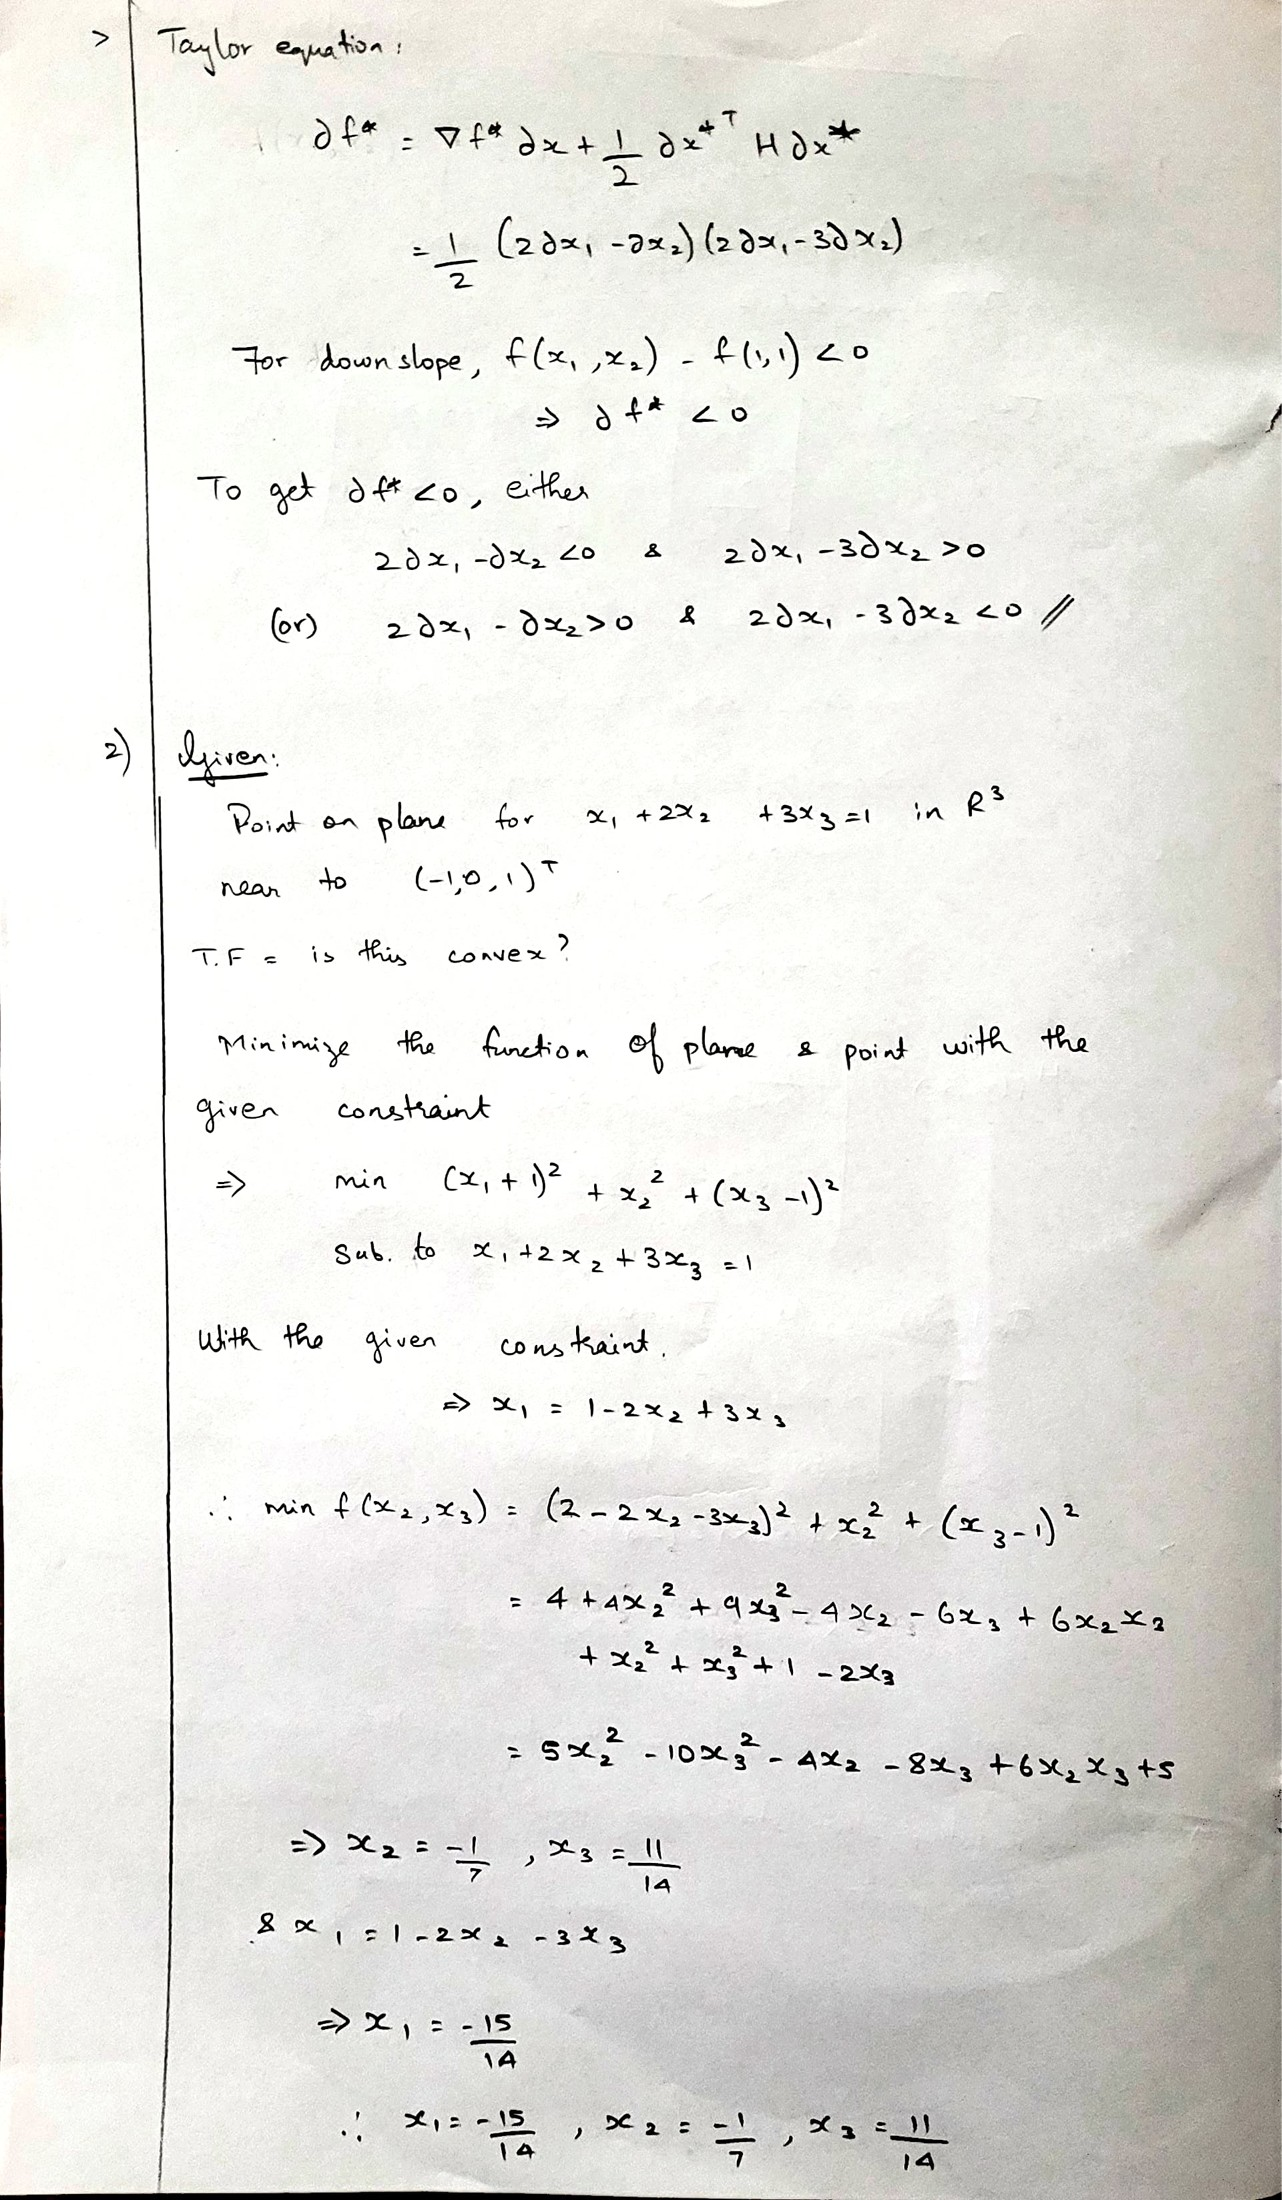

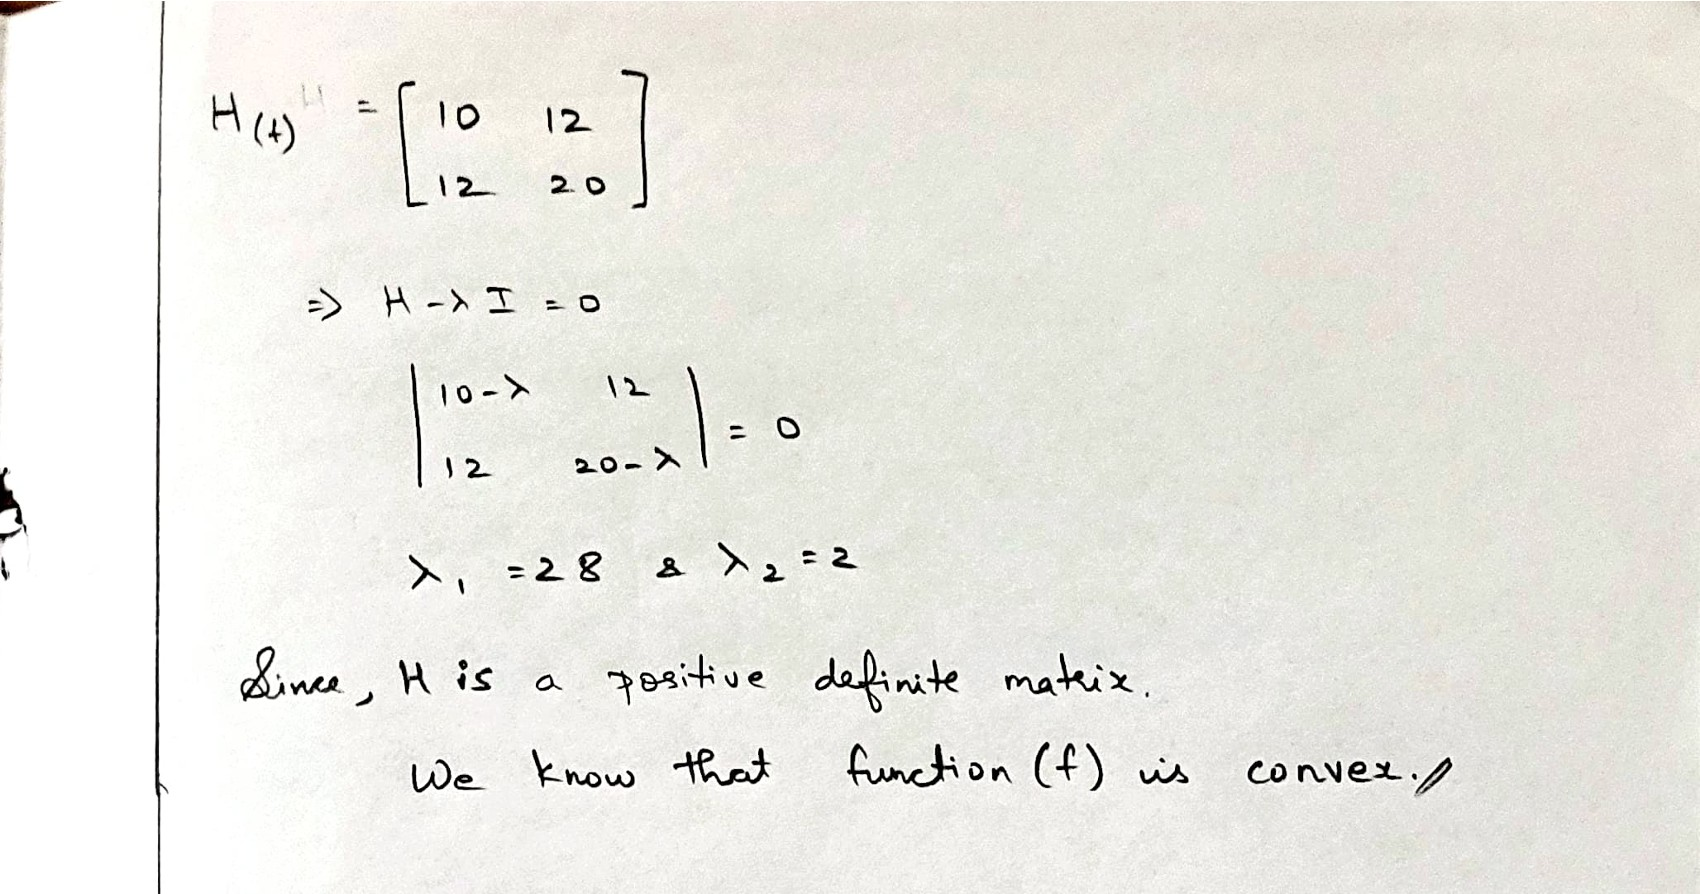

**Problem 2 - Part B**

Find the point in the plane x1 + 2x2 + 3x3 = 1 in R^3
that is nearest to the point (-1; 0; 1)^T . Is this a convex problem?
Hint: Convert the problem into an unconstrained problem using
x1 + 2x2 + 3x3 = 1.


Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes in the report, along with a short summary of your findings. The summary should include:

(1) The initial points tested;

(2) corresponding solutions;

(3) A log-linear convergence plot.

**Solving using Gradient descent algorithm**

Initial Guess (Newton's Algorithm): [[0]
 [0]]
Solution (Newton's Algorithm): x1 = [-1.07130214] , x2 = [-0.14284842] , and x3 = [0.78566633]
--------------------------------------------------
Initial Guess (Gradient Descent Algorithm): [[0]
 [0]]
Solution (Gradient Descent Algorithm): x1 = [-1.0713799] , x2 = [-0.14254022] , and x3 = [0.78548678]
--------------------------------------------------


<ipython-input-49-ddd6c48c360e>:85: RuntimeWarning: divide by zero encountered in log
  log_error_list_newton = [np.log(abs(objective_function(solution_newton[i]) - objective_function(solution_newton[-1])))
<ipython-input-49-ddd6c48c360e>:88: RuntimeWarning: divide by zero encountered in log
  log_error_list_gradient = [np.log(abs(objective_function(solution_gradient[i]) - objective_function(solution_gradient[-1])))


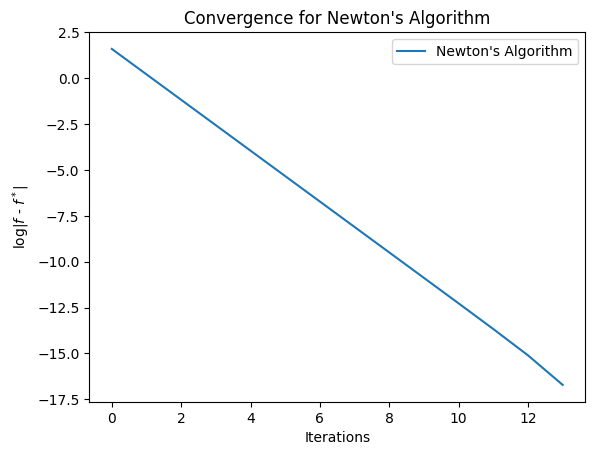

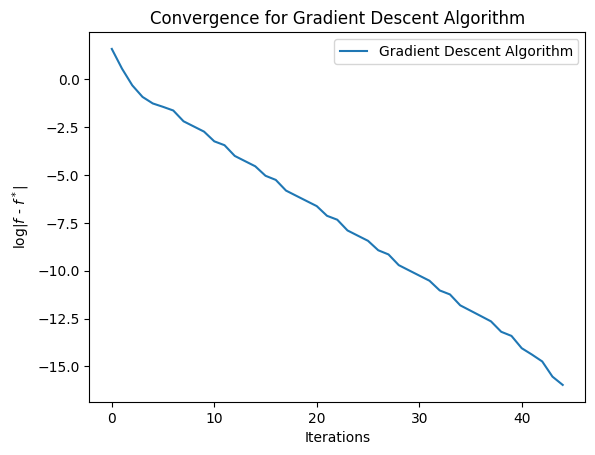

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def gradient(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

# Newton's Algorithm
max_iterations_newton = 1000
epsilon_newton = 1e-3
initial_guess_newton = np.array([[0], [0]])
iteration_newton = 0

solution_newton = [initial_guess_newton]
x_newton = solution_newton[iteration_newton]
error_newton = np.linalg.norm(gradient(x_newton), ord=2)

Hessian = np.array([[10, 12], [12, 20]])
learning_rate_newton = 0.5

error_list_newton = []
iteration_list_newton = []
error_list_newton.append(error_newton)
iteration_list_newton.append(iteration_newton)

for iteration_newton in range(max_iterations_newton):
    x_newton = x_newton - learning_rate_newton * np.matmul(np.linalg.inv(Hessian), gradient(x_newton))
    solution_newton.append(x_newton)
    error_newton = np.linalg.norm(gradient(x_newton), ord=2)
    iteration_newton += 1
    error_list_newton.append(error_newton)
    iteration_list_newton.append(iteration_newton)

    if error_newton < epsilon_newton:
        break

# Gradient Descent Algorithm
eps_gradient = 1e-3
initial_guess_gradient = np.array([[0], [0]])
iteration_gradient = 0

solution_gradient = [initial_guess_gradient]
x_gradient = solution_gradient[iteration_gradient]
error_gradient = np.linalg.norm(gradient(x_gradient), ord=2)

max_iterations_gradient = 1000
error_list_gradient = []
iteration_list_gradient = []
error_list_gradient.append(error_gradient)
iteration_list_gradient.append(iteration_gradient)

def line_search(x):
    step_size = 1.0
    phi = lambda step_size, x: objective_function(x) - step_size * 0.7 * np.matmul(gradient(x).T, gradient(x))
    while phi(step_size, x) < objective_function(x - step_size * gradient(x)):
        step_size *= 0.5
    return step_size

for iteration_gradient in range(max_iterations_gradient):
    step_size = line_search(x_gradient)
    x_gradient = x_gradient - step_size * gradient(x_gradient)
    solution_gradient.append(x_gradient)
    error_gradient = np.linalg.norm(gradient(x_gradient), ord=2)
    iteration_gradient += 1
    error_list_gradient.append(error_gradient)
    iteration_list_gradient.append(iteration_gradient)

    if error_gradient < eps_gradient:
        break

# Printing initial guesses and solutions for both methods
print("Initial Guess (Newton's Algorithm):", initial_guess_newton)
print("Solution (Newton's Algorithm):", 'x1 =', 1 - 2 * solution_newton[-1][0] - 3 * solution_newton[-1][1],
      ', x2 =', solution_newton[-1][0], ', and x3 =', solution_newton[-1][1])
print("-" * 50)

print("Initial Guess (Gradient Descent Algorithm):", initial_guess_gradient)
print("Solution (Gradient Descent Algorithm):", 'x1 =', 1 - 2 * solution_gradient[-1][0] - 3 * solution_gradient[-1][1],
      ', x2 =', solution_gradient[-1][0], ', and x3 =', solution_gradient[-1][1])
print("-" * 50)

# Plotting the graph
log_error_list_newton = [np.log(abs(objective_function(solution_newton[i]) - objective_function(solution_newton[-1])))
                        for i in range(len(iteration_list_newton))]

log_error_list_gradient = [np.log(abs(objective_function(solution_gradient[i]) - objective_function(solution_gradient[-1])))
                          for i in range(len(iteration_list_gradient))]

plt.figure(1)
plt.plot(iteration_list_newton, log_error_list_newton, label="Newton's Algorithm")
plt.xlabel('Iterations')
plt.ylabel('log|$f$ - $f^*$|')
plt.title("Convergence for Newton's Algorithm")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(iteration_list_gradient, log_error_list_gradient, label="Gradient Descent Algorithm")
plt.xlabel('Iterations')
plt.ylabel('log|$f$ - $f^*$|')
plt.title("Convergence for Gradient Descent Algorithm")
plt.legend()
plt.show()

**Problem 3**

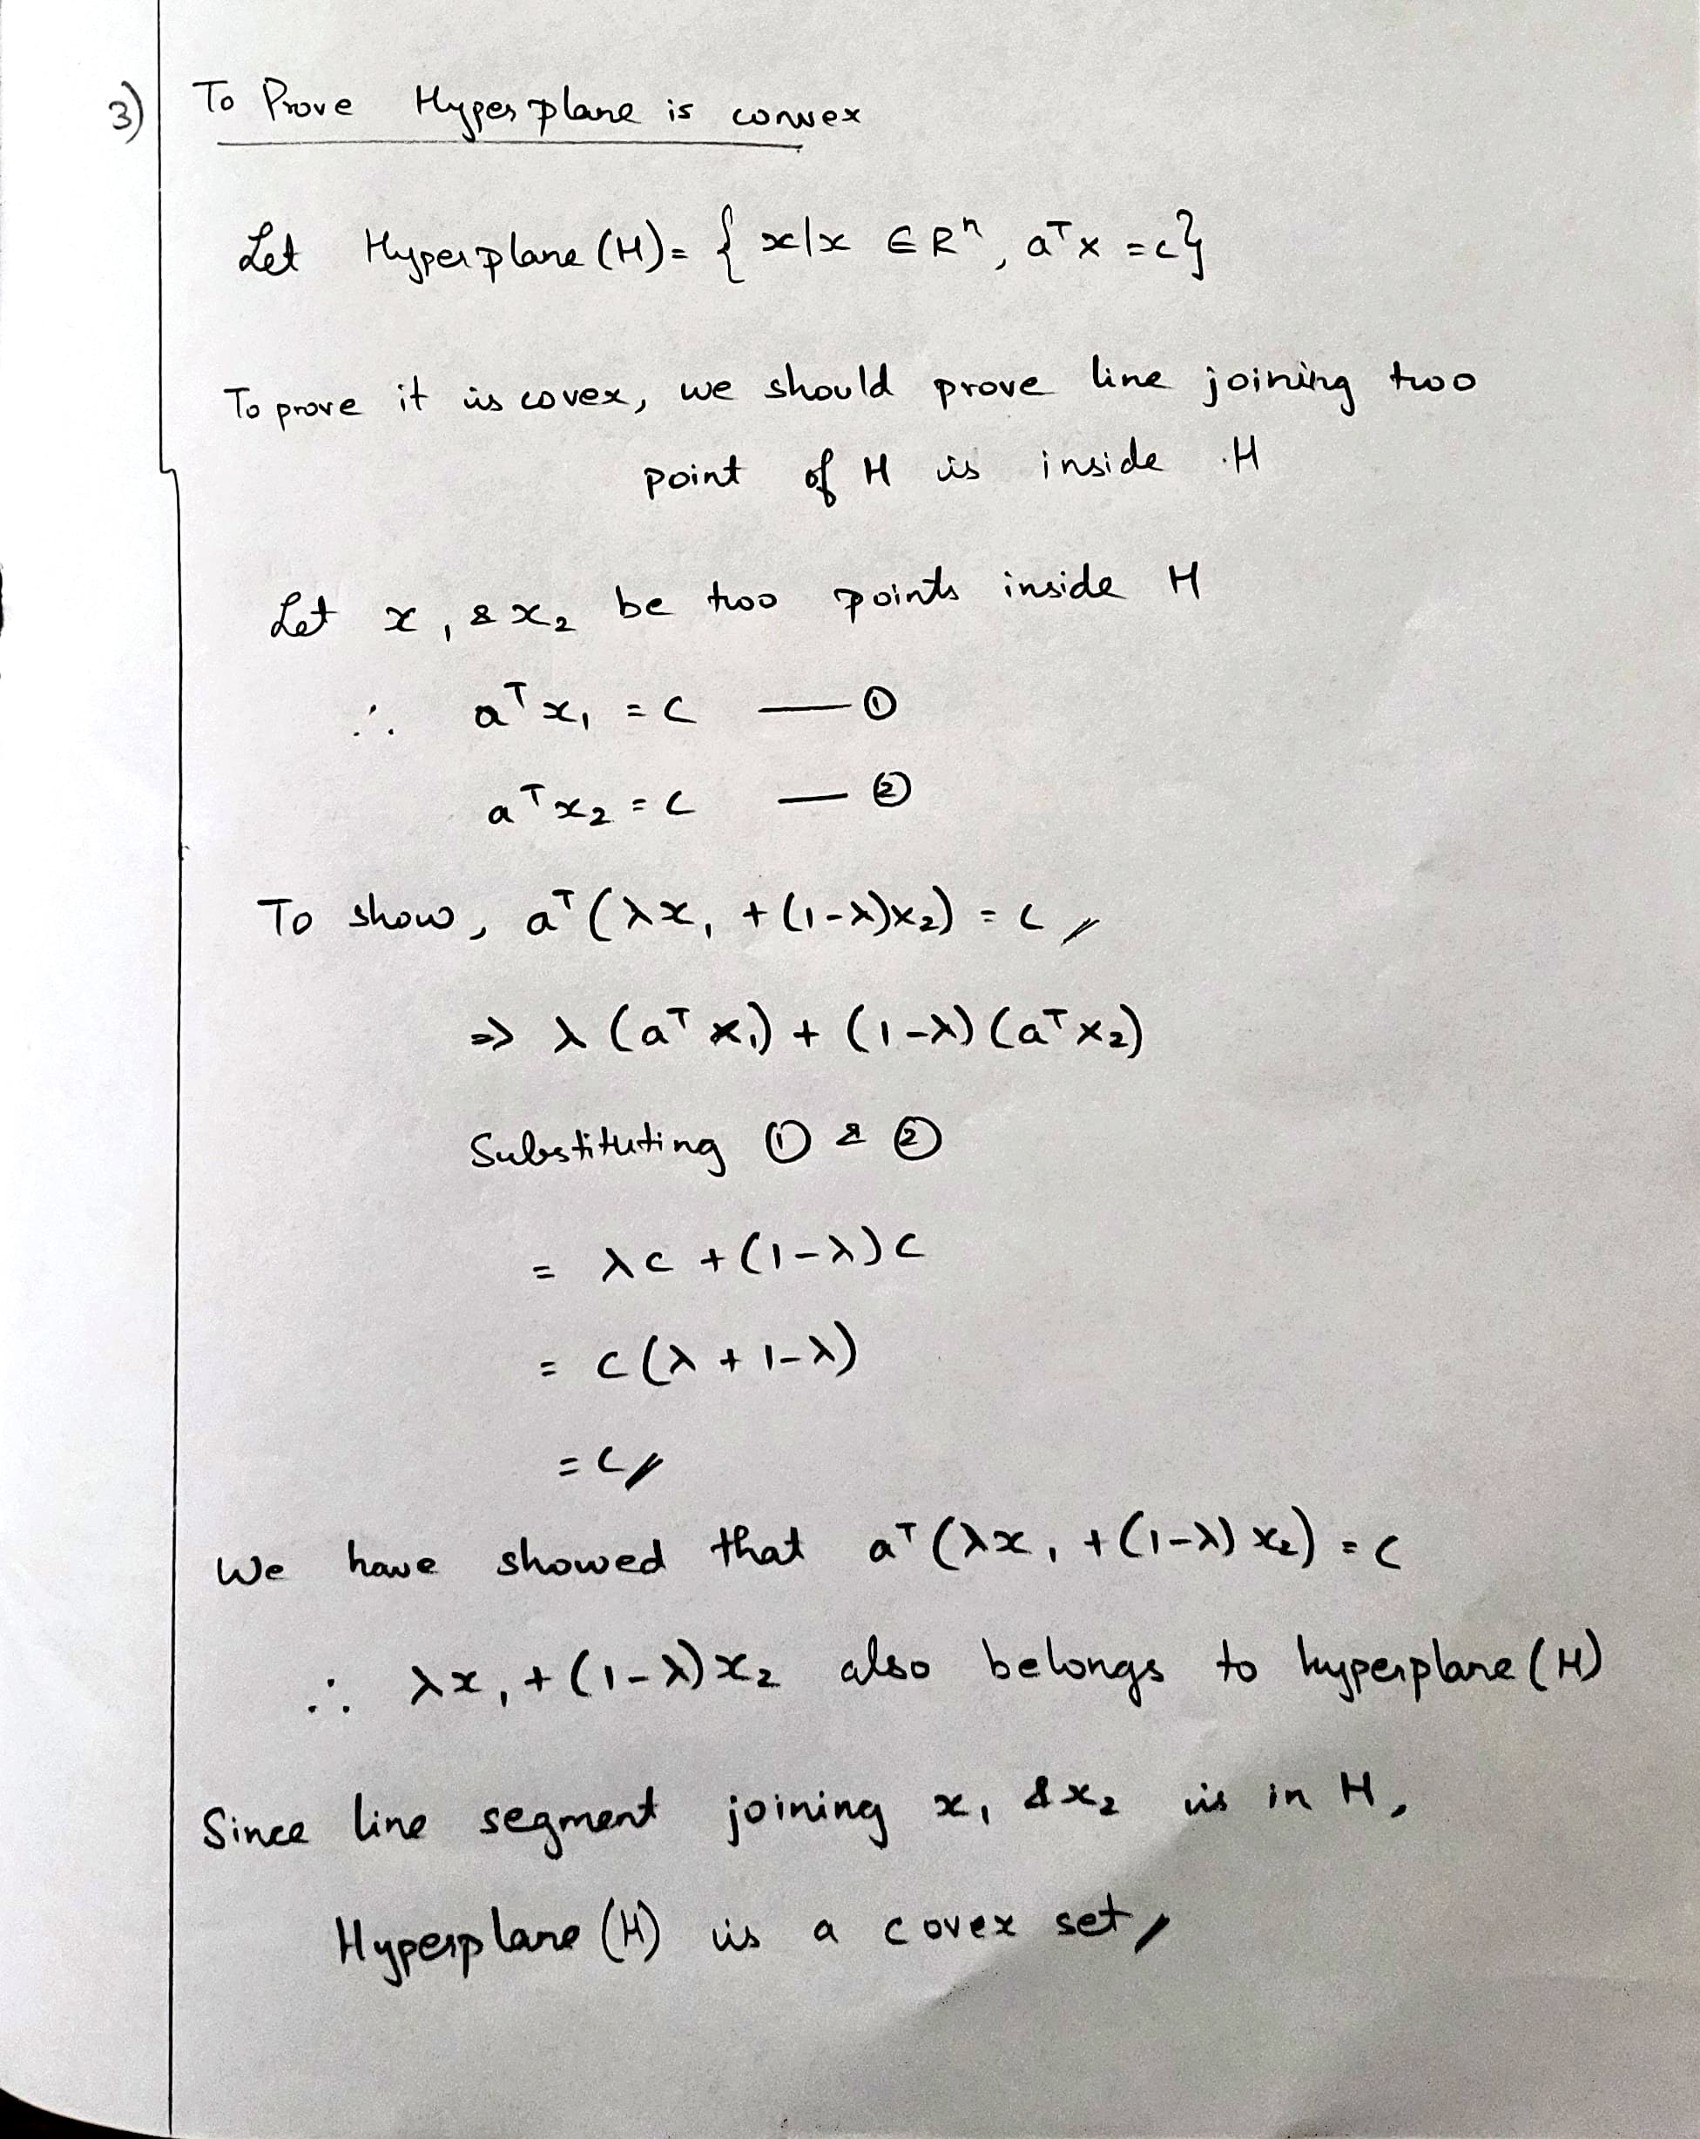

**Problem 4**

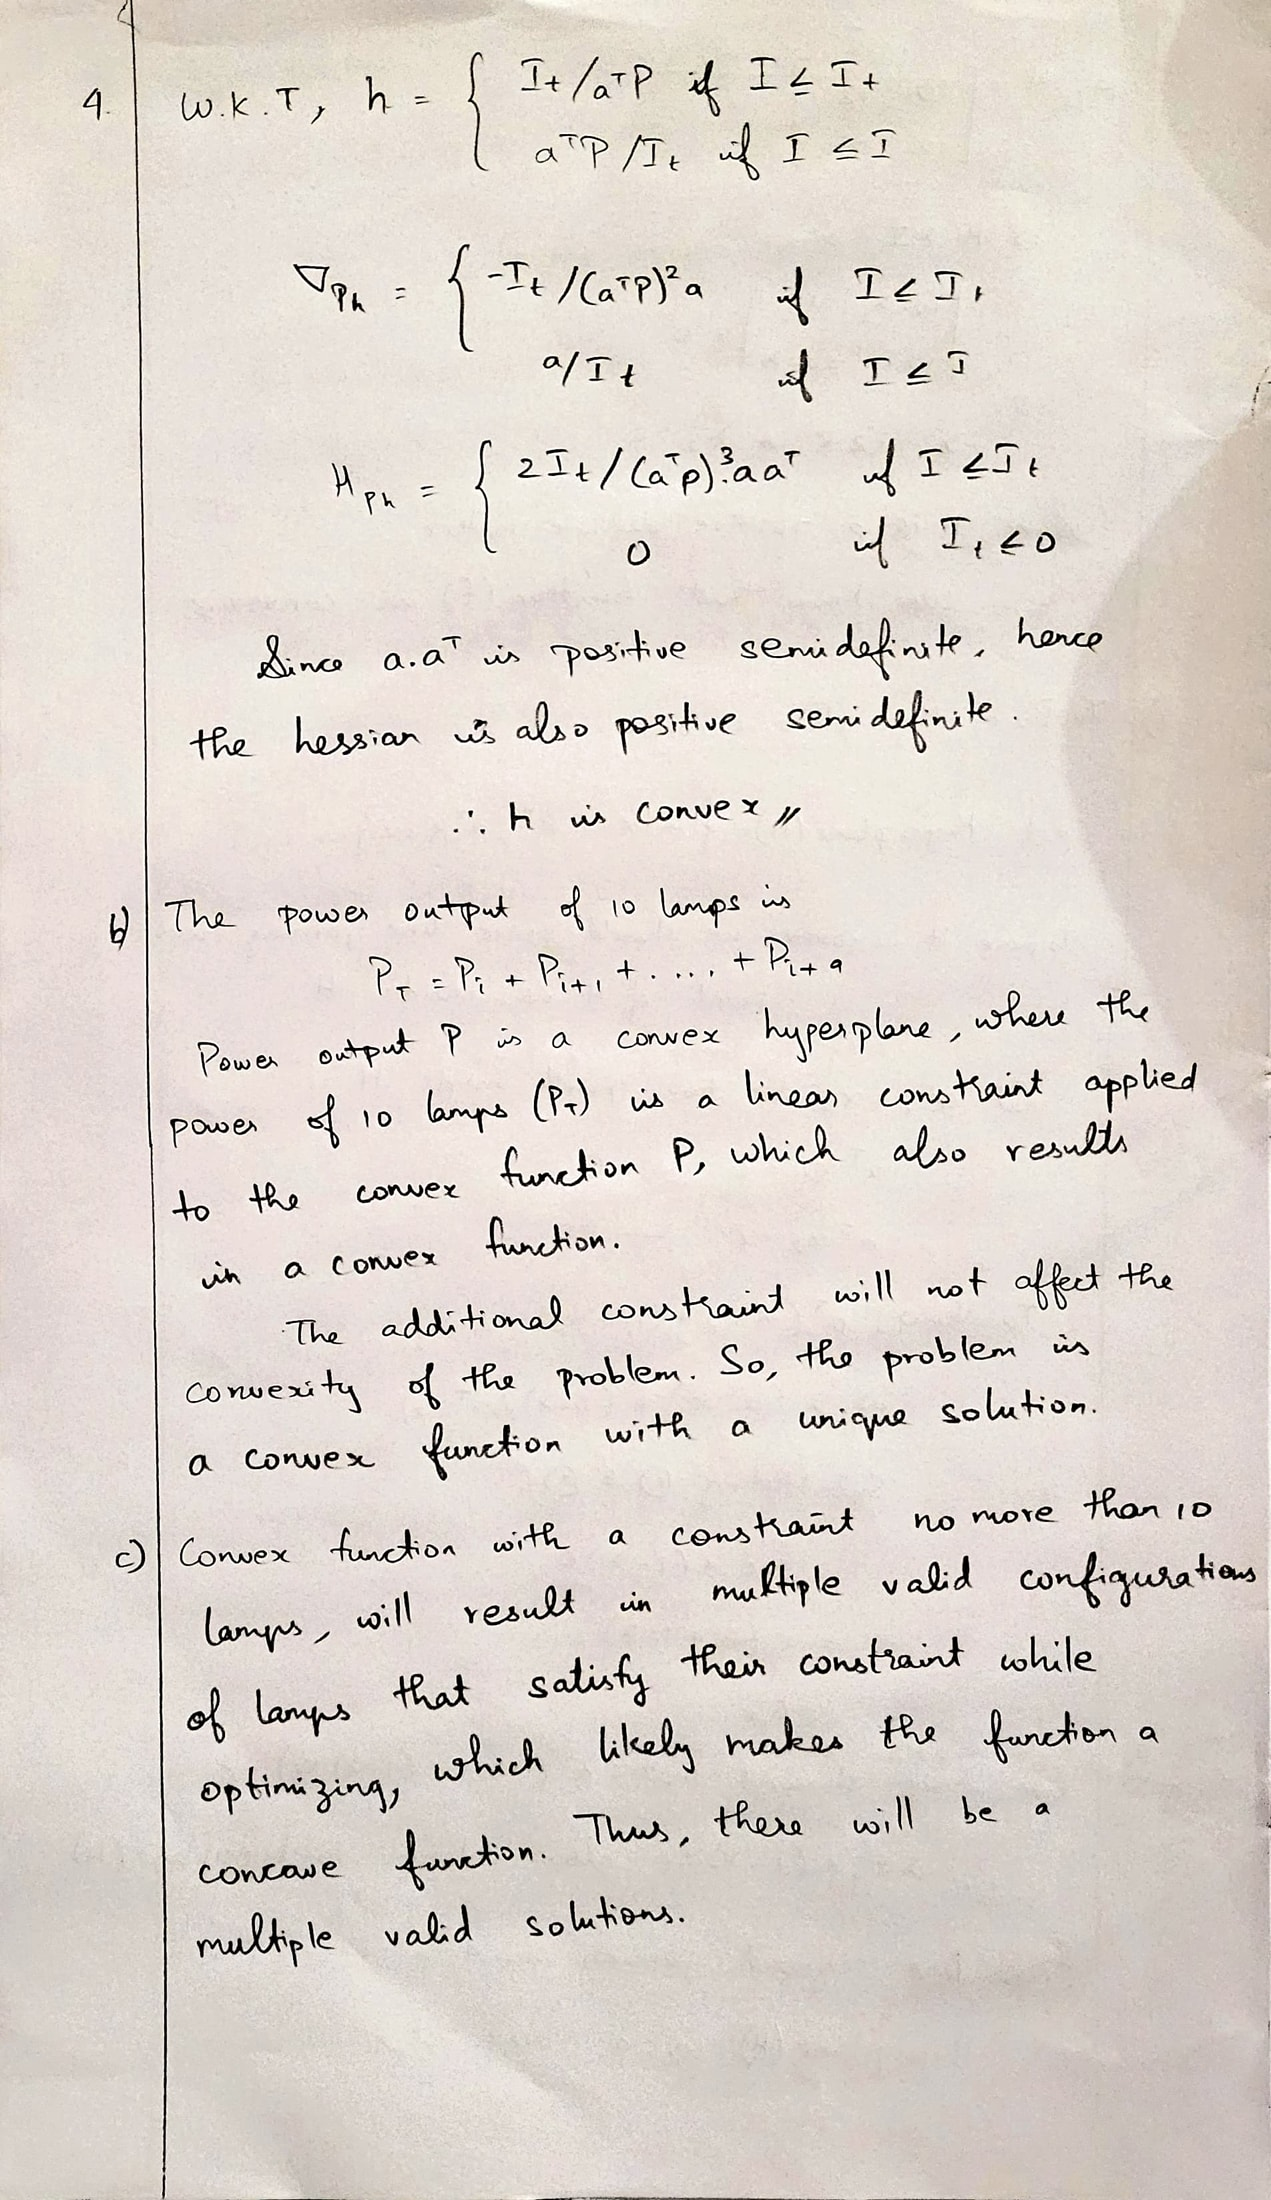

**Problem 5**

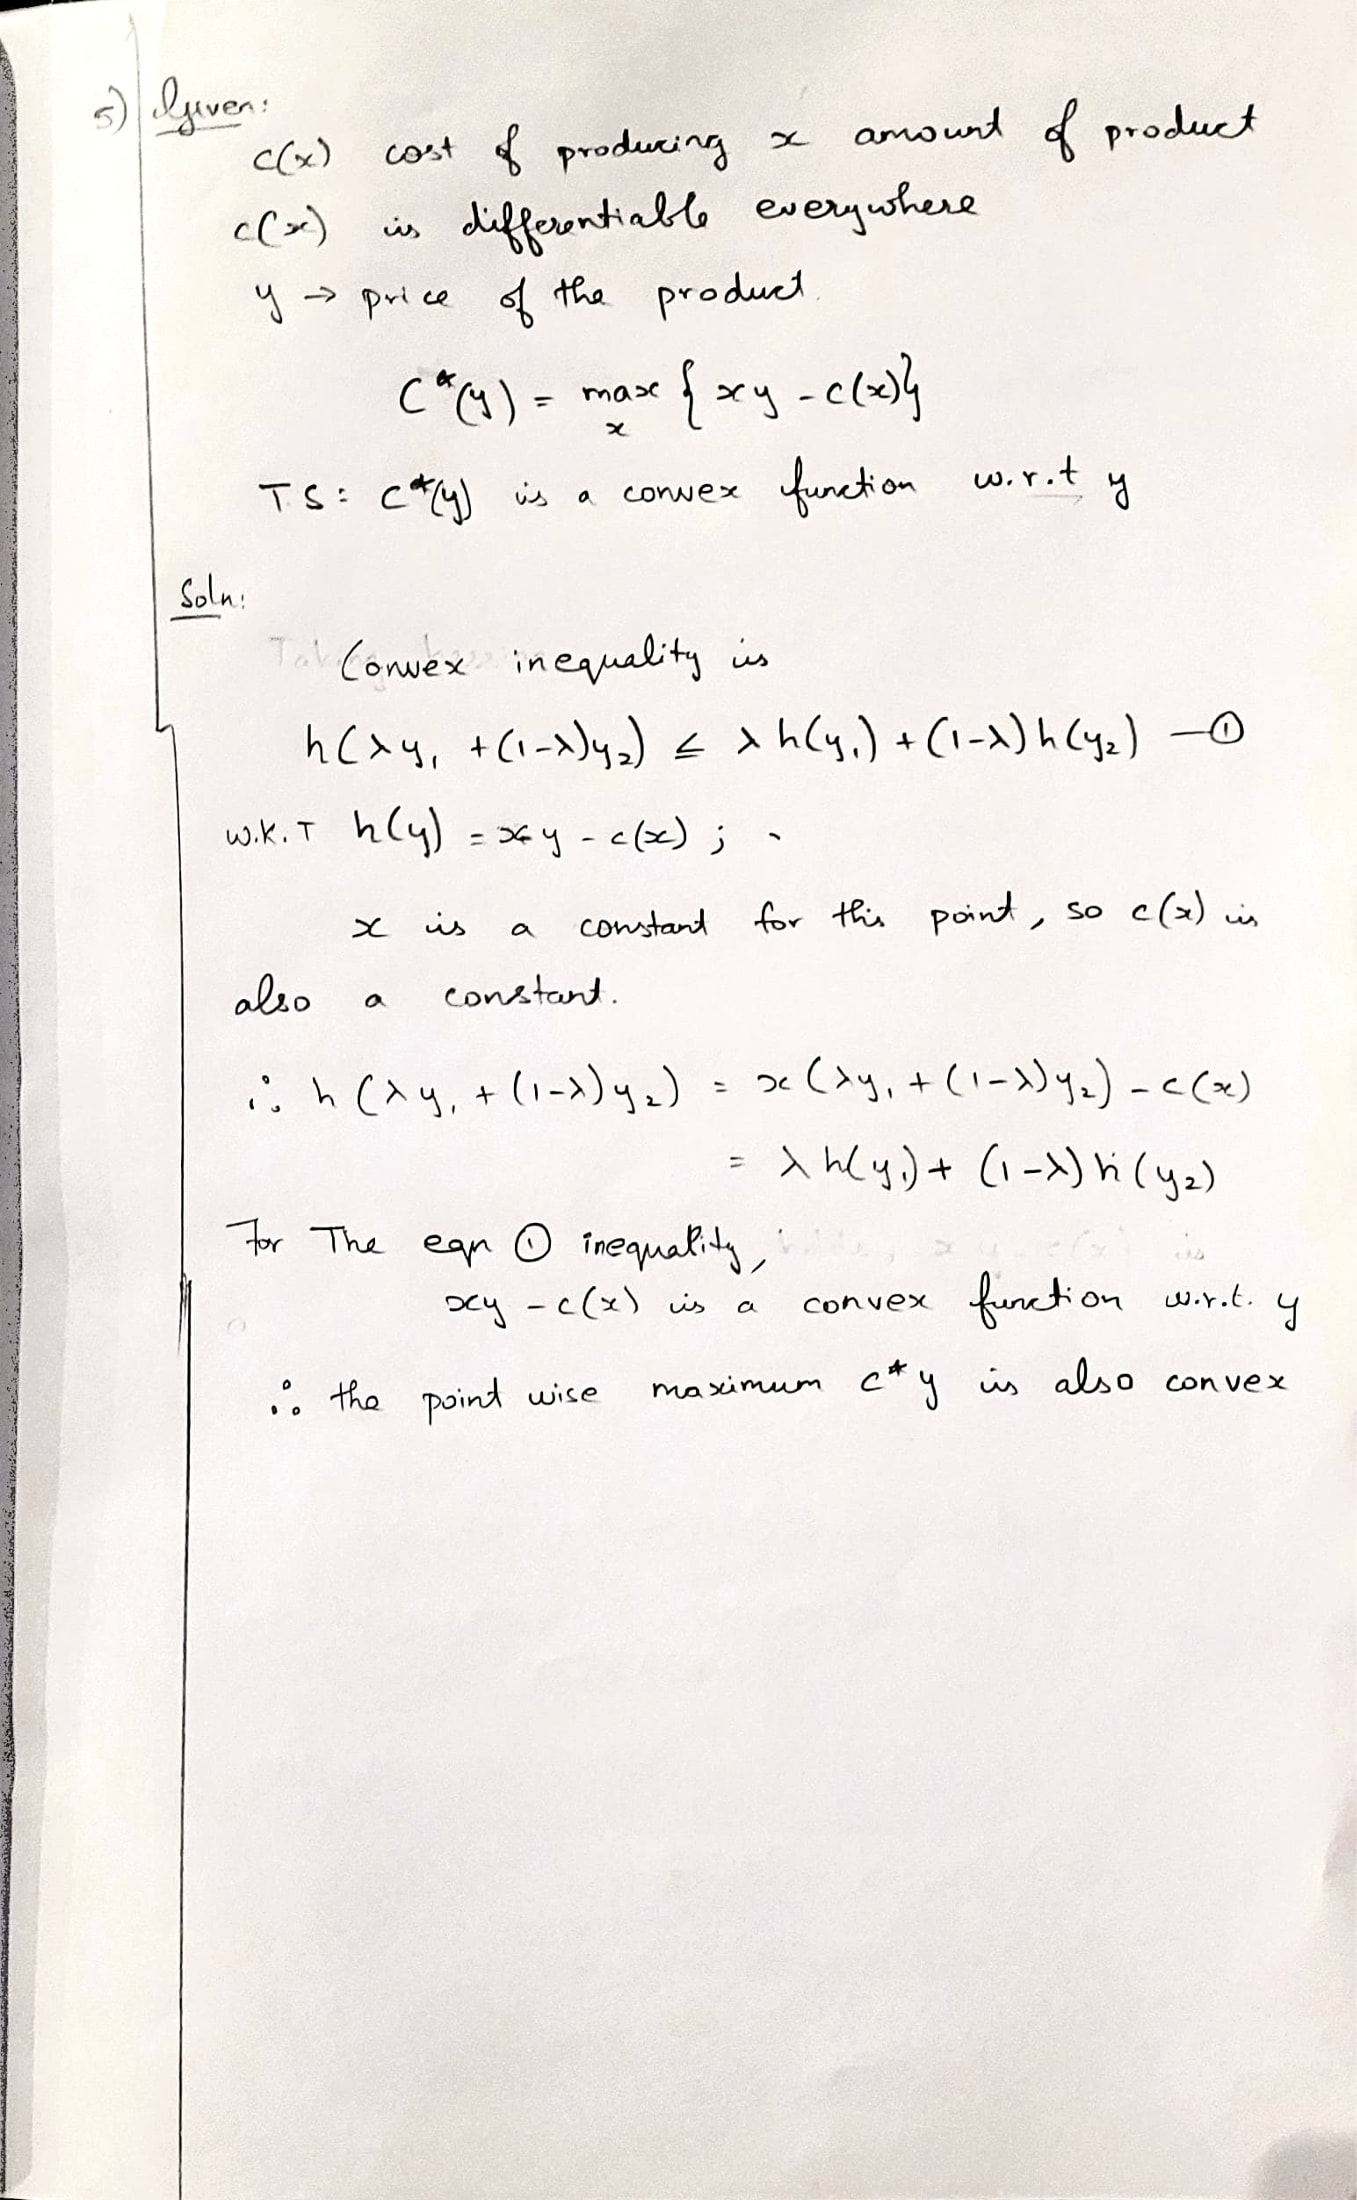